In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
netflix_df=pd.read_csv('E:/Datasets/netflix_titles.csv')
netflix_df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
#No of rows and columns
netflix_df.shape

(8807, 12)

In [4]:
# Getting info about dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_df.describe() # No inference from describe function

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
#Finding the list of columns 
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [7]:
# Extracting unique number of data in each columns
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
# Checking for any duplicate data 
netflix_df.duplicated().sum()

0

In [9]:
#Finding NaN values for each columns
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Replacing the below column NaN with 'Unknown'
netflix_df.date_added.fillna('Date Unknown',inplace=True)
netflix_df.rating.fillna('NR',inplace=True)
netflix_df.duration.fillna('Duration Unknown',inplace=True)
netflix_df.fillna('Unknown',inplace=True)

In [11]:
#Checking again for NaN values
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# Unique Release year
rel_year=pd.unique(netflix_df['release_year'])
print(sorted(rel_year))

[1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


Inference : So Netflix streams movies/shows of year starting 1925

In [13]:
rating_data=pd.unique(netflix_df['rating'])
print(rating_data)

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR']


From the unique list of rating we can find some duration time like '74 min','84 min','66 min'.This rows needs to be removed

In [14]:
# Rows having the wrong rating values:
wrong_rating=netflix_df[netflix_df['rating'].isin(['74 min','84 min','66 min'])]
wrong_rating

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,Duration Unknown,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,Duration Unknown,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,Duration Unknown,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# Removing the above rows
a=list(wrong_rating.index)
netflix_df.drop(a,inplace=True,axis=0)

In [16]:
# New shape of the dataframe
netflix_df.shape

(8804, 12)

In [17]:
# Checking new rating unique values
rating_new=netflix_df['rating'].unique()
print(rating_new)

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [18]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [19]:
# No of movies and shows in bar and pie plot by using subplots
plt.figure(figsize=(18,14),dpi=1600)
a=netflix_df[netflix_df.type=='Movie'].type.count()
b=netflix_df[netflix_df.type=='TV Show'].type.count()
ax1 = plt.subplot2grid((2,2),(0,0))
kj=sns.barplot(data=netflix_df,x=netflix_df.type.unique(),y=[a,b],palette='cubehelix')
plt.xlabel('Type of streaming',fontweight=8)
plt.ylabel('Count',fontweight=8)
kj.bar_label(kj.containers[0],fontsize=10)
plt.title('Movies and Shows count',fontsize=12,fontweight='bold')
ax1 = plt.subplot2grid((2,2),(0,1))
lm=plt.pie([a,b],labels=['Movie','TV Show'],autopct='%1.2f%%')
plt.title('Movies and Shows in percent',fontsize=12,fontweight='bold')

Text(0.5, 1.0, 'Movies and Shows in percent')

In [20]:
# Count based on Type and Rating
rating_df=netflix_df.groupby(['type','rating']).size().reset_index().sort_values(0,ascending=False)
rating_df.rename(columns={0:'Count'},inplace=True)
rating_df[:3]

,type,rating,Count
8,Movie,TV-MA,2062
6,Movie,TV-14,1427
18,TV Show,TV-MA,1145


PG-13    -----> Parental Guidance with Adult Themes
TV-MA    -----> Mature Audience
PG       -----> Parental Guidance without Adult Themes
TV-14    -----> Contents with Parents strongly cautioned . Similar to PG-13
TV-PG    -----> Parental guide suggested
TV-Y     -----> Children suited content
TV-Y7    -----> Children of age 7 and older
R        -----> Strictly for Adults
TV-G     -----> Suitable for all audiences
G        -----> General Audience films
NC-17    -----> No one seventeen and under admitted
NR       -----> Not rated movies
TV-Y7-FV -----> Children of age 7 and older with fantasy violence
UR       -----> recut version of rated movie

Text(0.5, 1.0, 'Count based on Type and Rating')

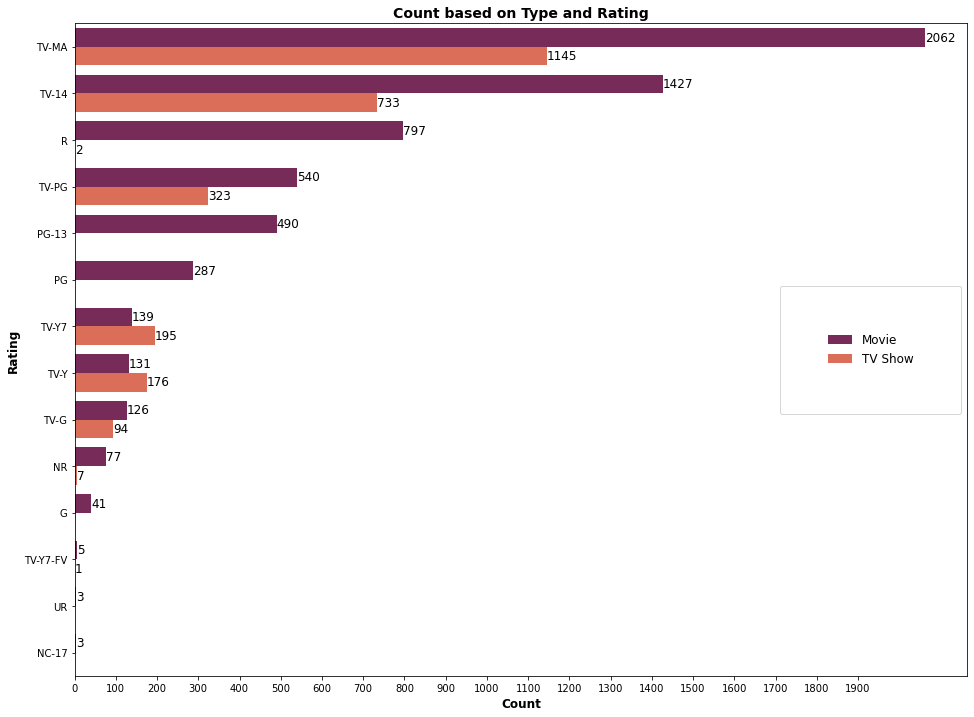

In [21]:
plt.figure(figsize=(16,12))
rat=sns.barplot(data=rating_df,x='Count',y='rating',hue='type',palette='rocket')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.ylabel('Rating',fontsize=12,fontweight='bold')
plt.xticks(np.arange(0,2000,100))
rat.bar_label(rat.containers[0],fontsize=12)
rat.bar_label(rat.containers[1],fontsize=12)
plt.legend(borderpad=4,loc=7,fontsize=12)
plt.title('Count based on Type and Rating',fontsize=14,fontweight='bold')

Category listing based on ['Parental Guidance','Only for Adults','General Audience & Kids','Not Rated']
PG-13    -----> Parental Guidance with Adult Themes[Parental Guidance]
TV-MA    -----> Mature Audience[Only for Adults]
PG       -----> Parental Guidance without Adult Themes[Parental Guidance]
TV-14    -----> Contents with Parents strongly cautioned . Similar to PG-13[Parental Guidance]
TV-PG    -----> Parental guide suggested[Parental Guidance]
TV-Y     -----> Children suited content[General Audience & Kids]
TV-Y7    -----> Children of age 7 and older[General Audience & Kids]
R        -----> Strictly for Adults[Only for Adults]
TV-G     -----> Suitable for all audiences[General Audience & Kids]
G        -----> General Audience films[General Audience & Kids]
NC-17    -----> No one seventeen and under admitted[Only for Adults]
NR       -----> Not rated movies[Not Rated]
TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]
UR       -----> recut version of rated movie[Not Rated]

In [22]:
# Combining rating based on category for better understanding as ['Parental Guidance','Only for Adults','General Audience & Kids','Not Rated']
# and taking out the counts for the respective category
category_1=['Parental Guidance','Only for Adults','General Audience & Kids','Not Rated']
#Parental Guidance Count
pg_df=netflix_df.rating.isin(['PG-13','PG','TV-14','TV-PG'])
PG=netflix_df[pg_df].rating.count()
#Only for Adults Count
ofa_df=netflix_df.rating.isin(['TV-MA','R','NC-17'])
OFA=netflix_df[ofa_df].rating.count()
#General Audience & Kids Count
gaak_df=netflix_df.rating.isin(['TV-Y','TV-Y7','TV-G','G','TV-Y7-FV'])
GAAK=netflix_df[gaak_df].rating.count()
#Not Rates Count
nr_df=netflix_df.rating.isin(['NR','UR'])
NR=netflix_df[nr_df].rating.count()

Text(0.5, 1.0, 'Rating simplified to Category plot')

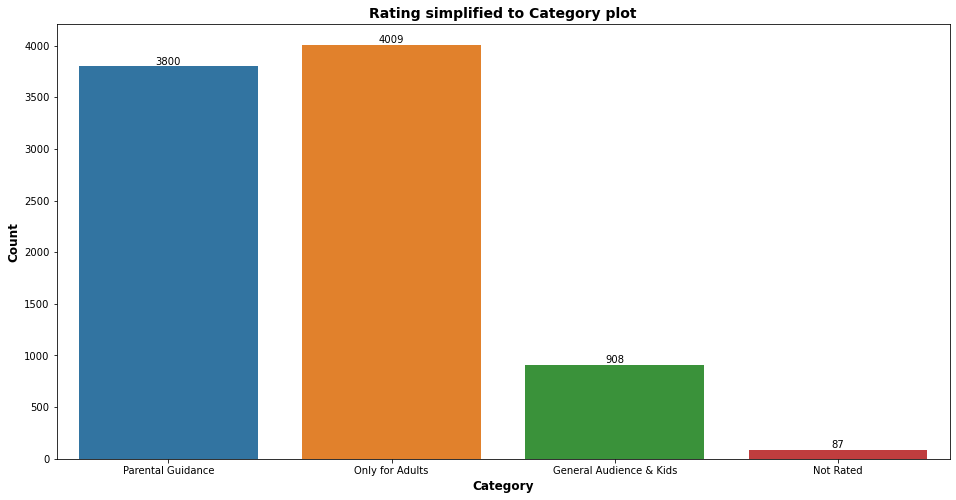

In [23]:
# Visualization of above scenario
plt.figure(figsize=(16,8))
alk=sns.barplot(x=category_1,y=[PG,OFA,GAAK,NR])
plt.bar_label(alk.containers[0],fontsize=10)
plt.xlabel('Category',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Rating simplified to Category plot',fontsize=14,fontweight='bold')

In [24]:
netflix_df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [25]:
# Director with most number of movies:
movies_df=netflix_df[netflix_df.type=='Movie']
Movie_director_num=movies_df.groupby('director').title.size().reset_index().sort_values('title',ascending=False)
Movie_director_num.rename(columns={'title':'Count of movies'},inplace=True)
Movie_director_num[1:6] # Excluding first row as they are unknown Directors

,director,Count of movies
3251,Rajiv Chilaka,19
3302,"Raúl Campos, Jan Suter",18
3884,Suhas Kadav,16
2491,Marcus Raboy,15
1716,Jay Karas,14


Rajiv Chilaka has directed the most number of movies

In [26]:
# Director with most number of TV shows:
tvshows_df=netflix_df[netflix_df.type=='TV Show']
TV_directordf=tvshows_df.groupby('director').title.size().reset_index().sort_values('title',ascending=False)
TV_directordf.rename(columns={'title':'Count of TV Shows'},inplace=True)
TV_directordf[1:6] # Excluding first row as they are unknown Directors

,director,Count of TV Shows
5,Alastair Fothergill,3
177,Rob Seidenglanz,2
187,Shin Won-ho,2
74,Iginio Straffi,2
72,Hsu Fu-chun,2


Alastair Fothergill has directed most TV shows

In [27]:
netflix_df[:3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [28]:
# Top 10 countries with most number of movies and TV show 
country_df=pd.DataFrame(movies_df.groupby(['type','country']).title.size().reset_index().sort_values('title',ascending=False))
country_df.rename(columns={'title':'Count'},inplace=True)
drop_index=country_df[country_df['country']=='Unknown'].index
country_df.drop(drop_index,inplace=True)
country_df[:3]

,type,country,Count
525,Movie,United States,2055
218,Movie,India,893
440,Movie,United Kingdom,206


Text(0.5, 1.0, 'Top 10 countries with most number of Movies')

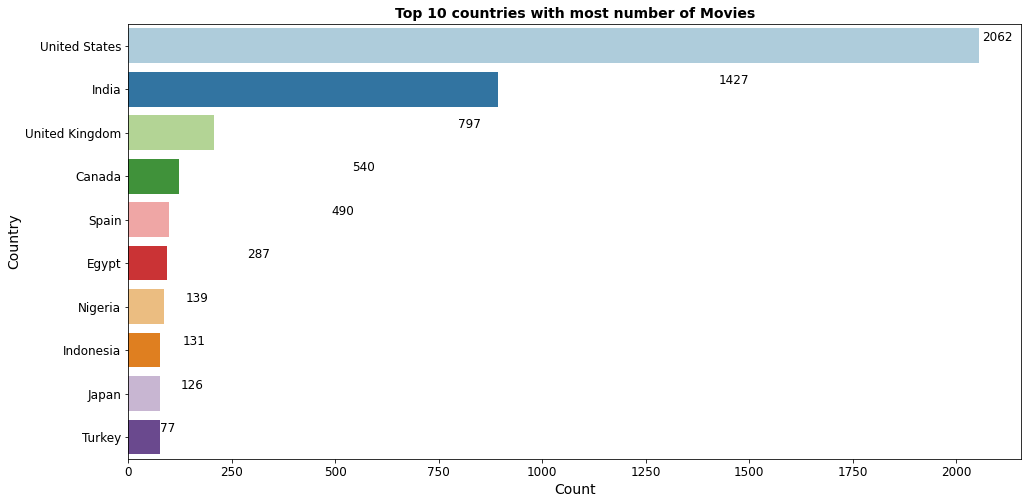

In [29]:
plt.figure(figsize=(16,8))
country_vis=sns.barplot(data=country_df[:10],x='Count',y='country',palette='Paired')
country_vis.bar_label(rat.containers[0],fontsize=12)
plt.xlabel('Count',fontsize=14)
plt.ylabel('Country',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 countries with most number of Movies',fontsize=14,fontweight='bold')

In [30]:
# Top 10 countries with most number of TV show 

In [31]:
TV_visual=tvshows_df.groupby('country').title.count().reset_index().sort_values('title',ascending=False)
TV_visual.rename(columns={'title':'Count'},inplace=True)
drop_index_1=TV_visual[TV_visual['country']=='Unknown'].index
TV_visual.drop(drop_index_1,inplace=True)
TV_visual[:3]

,country,Count
160,United States,760
140,United Kingdom,213
83,Japan,169


Text(0.5, 1.0, 'Top 10 countries with most number of TV Shows')

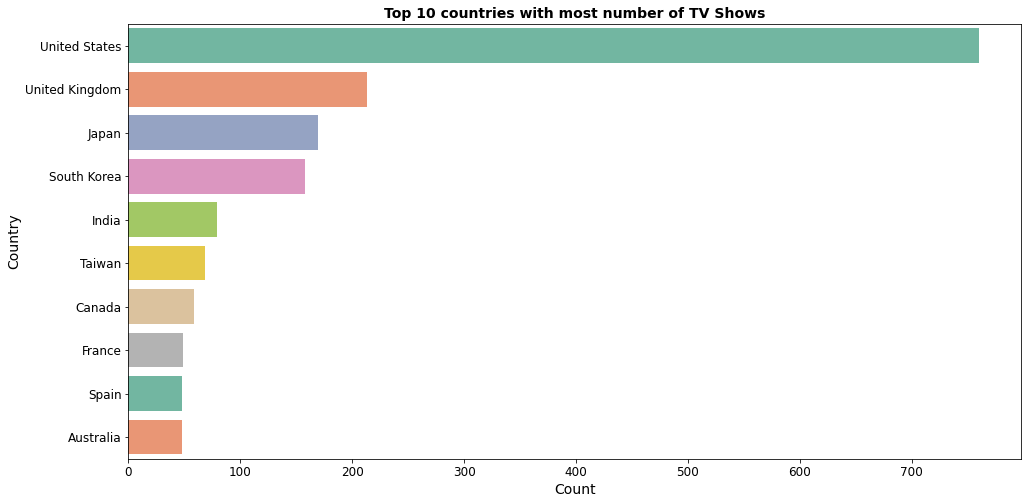

In [32]:
plt.figure(figsize=(16,8))
country_vis_1=sns.barplot(data=TV_visual[:10],x='Count',y='country',palette='Set2')
plt.xlabel('Count',fontsize=14)
plt.ylabel('Country',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 countries with most number of TV Shows',fontsize=14,fontweight='bold')

United States leads with most number of movies and tv shows directed/released.

In [33]:
# Movie dataframe
country_df[:3]

,type,country,Count
525,Movie,United States,2055
218,Movie,India,893
440,Movie,United Kingdom,206


In [34]:
# Since in the country column we can find movies with multiple country for eg : 
multiple_release=country_df.country.str.contains(',')
multiple_countrycount=country_df[multiple_release].Count.sum()
country_df[multiple_release]

,type,country,Count
514,Movie,"United Kingdom, United States",63
541,Movie,"United States, Canada",51
622,Movie,"United States, United Kingdom",38
73,Movie,"Canada, United States",32
139,Movie,"France, Belgium",24
...,...,...,...
228,Movie,"India, Nepal",1
227,Movie,"India, Mexico",1
226,Movie,"India, Malaysia",1
225,Movie,"India, Japan",1


In [35]:
# Movies that were released in single country:
individual_movie=country_df.Count.sum()-multiple_countrycount
individual_movie

4613

Text(0.5, 1.0, 'Individual Vs Multiple Country Movie release')

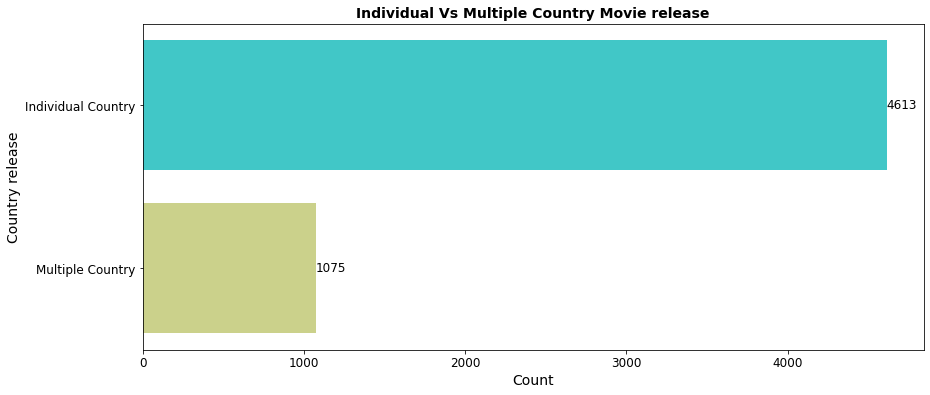

In [36]:
# Visualization of movies released in single vs multiple countries
plt.figure(figsize=(14,6))
country_vis_2=sns.barplot(y=['Individual Country','Multiple Country'],x=[individual_movie,multiple_countrycount],palette='rainbow')
plt.ylabel('Country release',fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar_label(country_vis_2.containers[0],fontsize=12)
plt.title('Individual Vs Multiple Country Movie release',fontsize=14,fontweight='bold')

In [37]:
# TV Show dataframe
TV_visual[:3]

,country,Count
160,United States,760
140,United Kingdom,213
83,Japan,169


In [38]:
# Since in the country column we can find TV Shows with multiple country for eg : 
multiple_TV=TV_visual.country.str.contains(',')
multipleTV_count=TV_visual[multiple_TV].Count.sum()
TV_visual[multiple_TV][:5]

,country,Count
164,"United States, Canada",22
25,"Canada, United States",13
155,"United Kingdom, United States",12
180,"United States, Japan",10
193,"United States, United Kingdom",9


Text(0.5, 1.0, 'Individual Vs Multiple Country TV Show release')

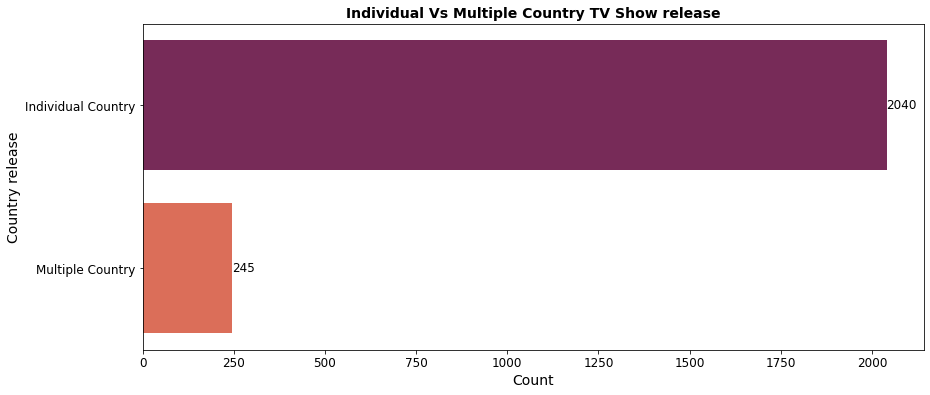

In [39]:
# TV Shows that were released in individual country
individual_TV=TV_visual.Count.sum()-multipleTV_count
plt.figure(figsize=(14,6))
country_vis_2=sns.barplot(y=['Individual Country','Multiple Country'],x=[individual_TV,multipleTV_count],palette='rocket')
plt.ylabel('Country release',fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar_label(country_vis_2.containers[0],fontsize=12)
plt.title('Individual Vs Multiple Country TV Show release',fontsize=14,fontweight='bold')

Both movie and TV shows are being released individually/Single country in more number compared to multiple languages

In [40]:
# original dataframe
netflix_df[:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
# Forming a dataframe for year based count
year_count=netflix_df.groupby(['release_year','type']).title.count().reset_index()
year_count.rename(columns={'title':'Count'},inplace=True)
year_count[:5]

,release_year,type,Count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


Text(0.5, 1.0, 'Evolution of Movies/TV shows over the years')

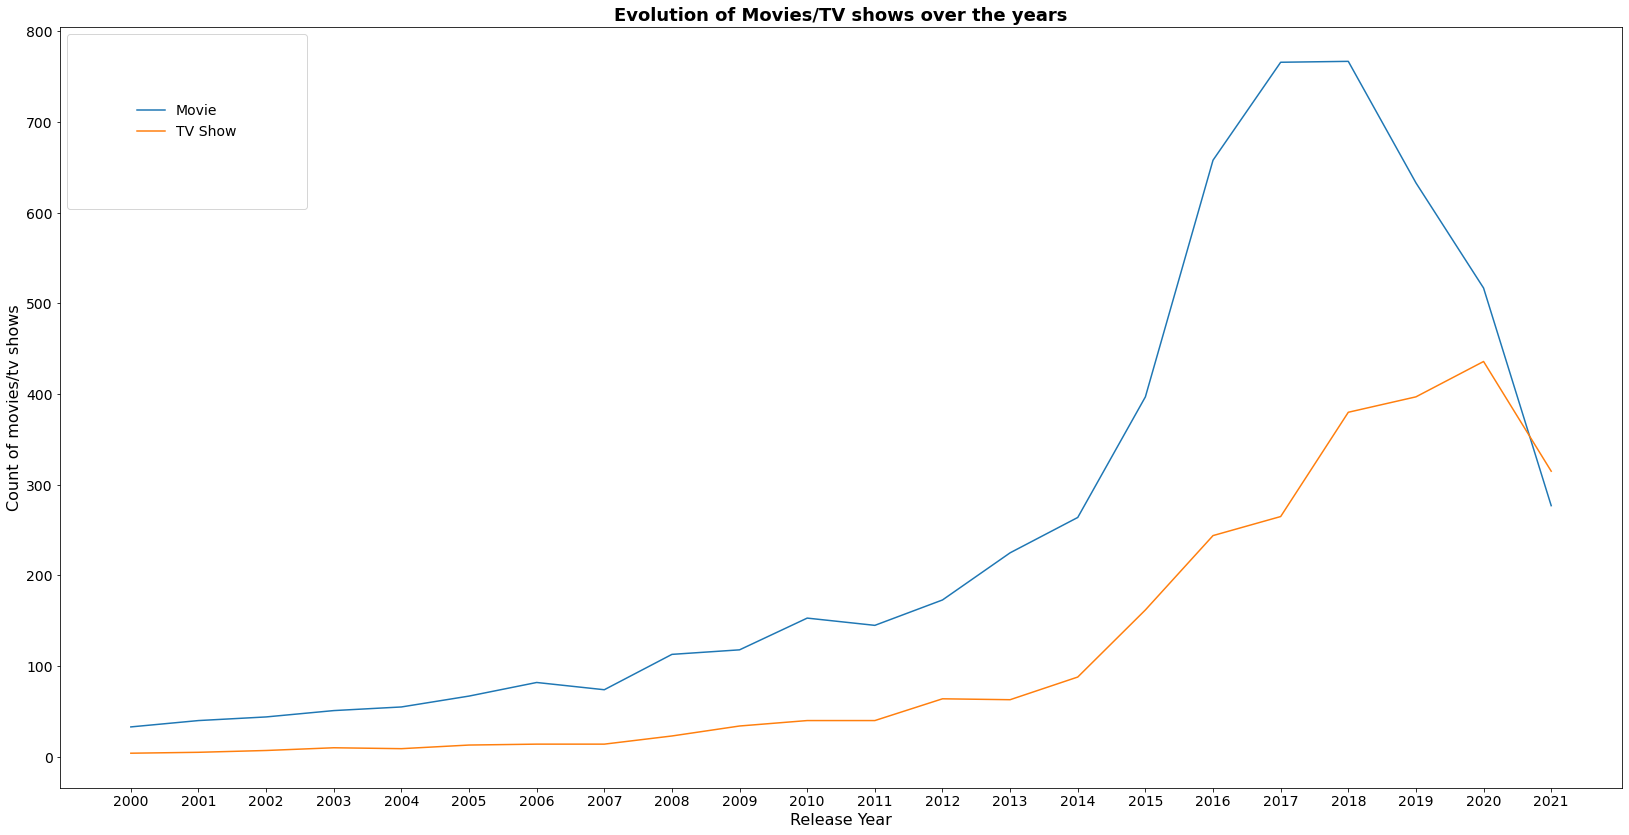

In [42]:
# Evolution of TV and Movie over years from the year 2000
plt.figure(figsize=(28,14))
sns.lineplot(data=year_count[75:],x='release_year',y='Count',hue='type') #year_count starting from 75 as we want from year 2000
plt.ylabel('Count of movies/tv shows',fontsize=16)
plt.xlabel('Release Year',fontsize=16)
plt.xticks(np.arange(2000,2022,1),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14,borderpad=5)
plt.title('Evolution of Movies/TV shows over the years',fontsize=18,fontweight='bold')

Both Movies and TV shows have been rapidly produced over the years.For Movies the peak seems to be in year 2015 to mid 2018.After there is a sudden decrease.Whereas for TV Shows the peak is from 2018 to start of 2020.But the decrease of TV Shows production is somewhat better compared to production of movies where there was a rapid decrease.Movies production seem to be at worst phase at mid 2020 where TV shows production overtakes Movie production for the year 2021

In [43]:
# Movie with Longest and Shortest duration
copy_df=netflix_df.copy()
duration_min=copy_df[copy_df.type=='Movie'].sort_values('duration',ascending=False)
duration_min['no_min']=[int(i.split(" ")[0]) for i in duration_min.duration]
duration_min.sort_values('no_min',ascending=False,inplace=True)
duration_min[:3] #Top 3 movies with longest duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_min
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312
717,s718,Movie,Headspace: Unwind Your Mind,Unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",Unknown,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",273
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253


In [44]:
duration_min[:-4:-1]# # movies with shortest duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_min
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,"June 4, 2019",2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3
2713,s2714,Movie,Sol Levante,Akira Saitoh,Unknown,Japan,"April 2, 2020",2020,TV-14,5 min,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,5
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8


Black Mirror: Bandersnatch is the largest duration movie with 312 mins(neary 5 hours 12 min) while Silent has the shortest duration of 3 mins.

In [45]:
TV_seasons=copy_df[copy_df['type']=='TV Show'].sort_values('duration',ascending=False)
TV_seasons['Seasons']=[int(i.split(" ")[0]) for i in TV_seasons.duration]
TV_seasons.sort_values('Seasons',ascending=False,inplace=True)
TV_seasons[:3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Seasons
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,17
4798,s4799,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,15
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",15


In [46]:
TV_seasons[:-4:-1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Seasons
3696,s3697,TV Show,Record of Grancrest War,Unknown,"Kentaro Kumagai, Akari Kito, Yuichi Nakamura, ...",Japan,"July 1, 2019",2018,TV-MA,1 Season,"Anime Series, International TV Shows","Lone mage Siluca wanders the land of Atlatan, ...",1
8148,s8149,TV Show,Tales of the City (1993),Unknown,"Olympia Dukakis, Donald Moffat, Laura Linney, ...","United Kingdom, United States","June 28, 2019",1993,TV-MA,1 Season,TV Dramas,"In 1976, naive Mary Ann Singleton moves to San...",1
132,s133,TV Show,Brave Animated Series,Unknown,"Tseng Yun-fan, Kao Yun-shuo, Chiang Ching-yen,...",Unknown,"September 1, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",A group of superheroes sets out to rid the wor...,1


Grey's Anatomy is the longest TV show with 17 Seasons